# Loan Features Effect on Loan Status and Borrower's APR

## by Alya Fattah

## Investigation Overview

In this investigation, I wanted to find the features that are best for predicting the Loan Status and the Borrower's APR. Our main features here are Employment Status, Debt to Income Ratio, Loan Amount, Term and Proper Rating.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

In [3]:
# Define features of interest for this analysis
main_features=['LoanStatus', 'ListingCategory (numeric)', 'EmploymentStatus', 
          'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', 
            'IncomeVerifiable', 'LoanOriginalAmount', 'BorrowerAPR', 
            'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)','ProsperScore']
df_sub=df[main_features]

In [4]:
# Fill nan values with 'Not available' in EmploymentStatus
df_sub['EmploymentStatus'].fillna(value='Not available', inplace=True)

In [5]:
#Remove loans with missing borrower APR information - 113912 non-null
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

## Number of Loans for each Employment Status

We observed although ~50% of the loans are current/active, the company is managing to reduce its risk by having ~83% of the borrowers either employed or full-time .

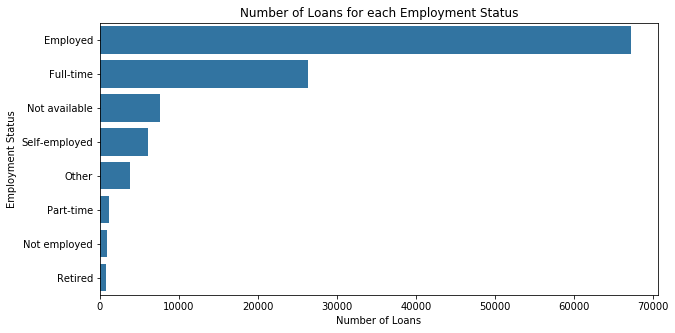

In [6]:
plt.figure(figsize=[10, 5])
sb.countplot(data = df_sub, y = 'EmploymentStatus',
             color = sb.color_palette()[0],
             order=df_sub['EmploymentStatus'].value_counts().index)
plt.ylabel('Employment Status')
plt.xlabel('Number of Loans')
plt.title('Number of Loans for each Employment Status')
plt.show();


## Distribution of Debt to Income Ratio

We can see that Prosper is maintaining its low risk level also via a right skewed Debt to Income Ratio distribution that is mainly between 0-0.4.

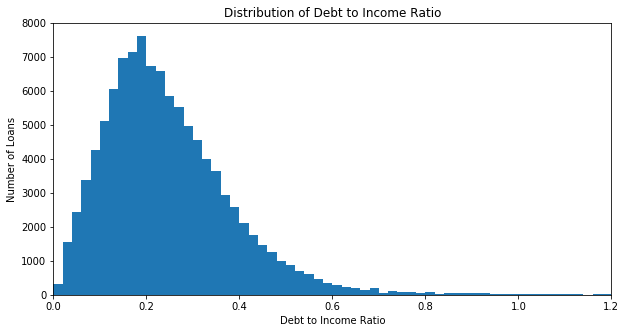

In [7]:
plt.figure(figsize=[10, 5])
plt.hist(data = df_sub[df_sub['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = np.arange(0, df_sub['DebtToIncomeRatio'].max()+0.02, 0.02))
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Number of Loans')
plt.title('Distribution of Debt to Income Ratio')
plt.xlim(0,1.2)
plt.show();

## Borrower's APR per Loan Amount

We observe high negative correlation between Borrower 's APR & Loan Original Amount(-0.323) as the higher the Loan Amount the lower APR would be.

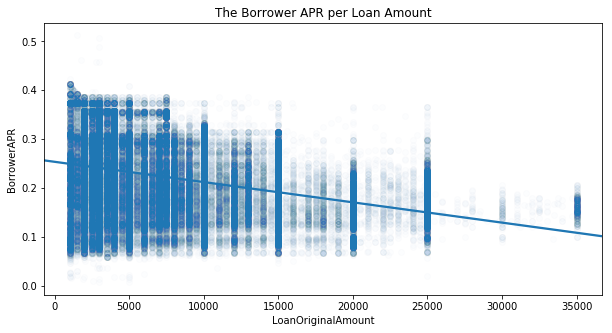

In [8]:
plt.figure(figsize = [10, 5])
sb.regplot(data = df_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('The Borrower APR per Loan Amount')
plt.show();

## Number of Loans per Employment Status & Term
We noticed a relationship between Employment Status and Term where employed people take the most number of loans which are all mainly 36 months long.

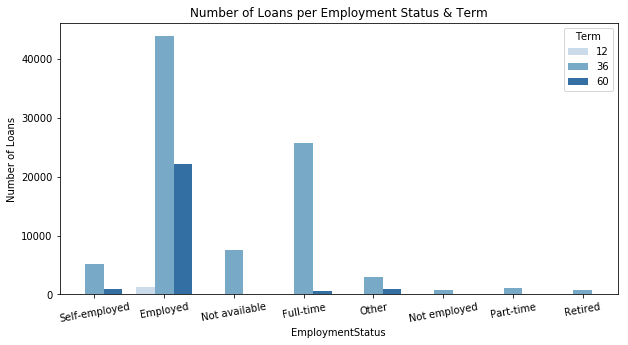

In [9]:
plt.figure(figsize = [10, 5])
sb.countplot(data =df_sub, x ='EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Employment Status & Term')
plt.show();

In [10]:
# Convert ProsperRating into ordered categorical types
ProsperRating_order = ['HR','E','D','C','B','A','AA']
ordered_col = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ProsperRating_order)
df_sub['ProsperRating (Alpha)'] = df_sub['ProsperRating (Alpha)'].astype(ordered_col)

## Term effect on relationship of Prosper Rating and APR or Loan Amount

We observe that people with higher ratings tend to borrower higher amounts and have lower APR. We also notice that the borrower APR decrease with the increase of borrowers' term with HR-C ratings and the APR increase with the increase of borrowers' term with B-AA ratings. 

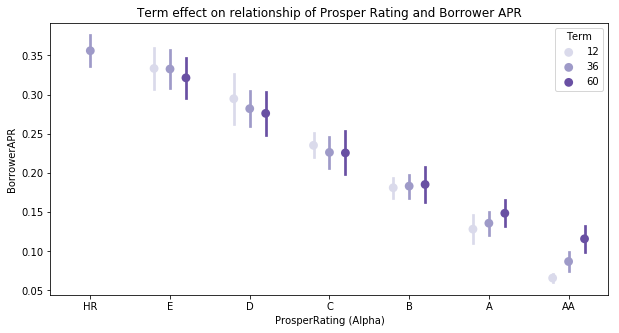

In [11]:
plt.figure(figsize = [10, 5])
sb.pointplot(data = df_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4,ci='sd')
plt.title('Term effect on relationship of Prosper Rating and Borrower APR');

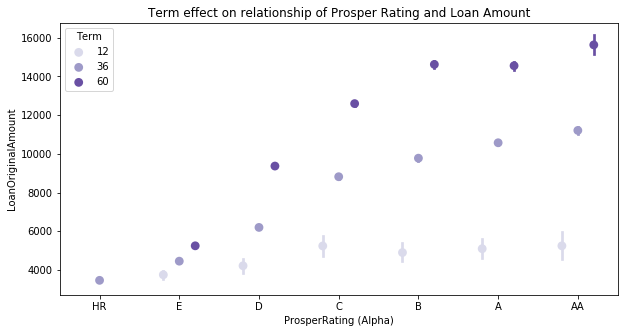

In [12]:
plt.figure(figsize = [10, 5])
sb.pointplot(data = df_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4);
plt.title('Term effect on relationship of Prosper Rating and Loan Amount');

### Conclusion

To conlcude,the main feature effecting loan status and borrower's APR are employment status, debt to income ratio, loan amount, term and Proper rating.

Prosper is reducing its risk by targeting low debt to income ratio, high amount of loans with income verification and mainly employed borrowers. We observed high negative correlation between Borrower 's APR & Loan Original Amount(-0.323) as the higher the Loan Amount the lower APR would be. We saw a relationship between Employment Status and Term where employed people take the most number of loans which are all mainly 36 months long. We also noticed that the borrower APR decrease with the increase of borrowers' term with HR-C ratings and the APR increase with the increase of borrowers' term with B-AA ratings.